In [50]:
import numpy as np
import pandas as pd
from pathlib import Path

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Select Product Code 841810, 841840, or 841850
Product=841850

In [51]:
#'My number is: {one}, and my name is: {two}'.format(one=num,two=name)
'UK Import Mirror Data - Unit Value\{}-2015-UK-Import-mirror-Unit-Value.txt'.format(Product)

'UK Import Mirror Data - Unit Value\\841850-2015-UK-Import-mirror-Unit-Value.txt'

In [52]:
#Butun Dosyalar okunur Dosya isimleri duzenlenmelidir.
UK_16 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2016-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_15 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2015-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_13 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2013-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_12 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2012-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_10 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2010-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_09 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2009-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_07 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2007-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_05 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2005-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')
UK_04 = pd.read_csv('UK Import Mirror Data - Unit Value\{}-2004-UK-Import-mirror-Unit-Value.txt'.format(Product),sep='\t')

In [53]:
#Butun Importer bilgisine gore birlestirilir.
UK_all = UK_16.merge(UK_15, 
                       
                        on = 'Exporters',how = 'left').merge(UK_13,
                        on = 'Exporters',how = 'left').merge(UK_12, 
                        on = 'Exporters',how = 'left').merge(UK_10,
                        on = 'Exporters',how = 'left').merge(UK_09, 
                        on = 'Exporters',how = 'left').merge(UK_07,
                        on = 'Exporters',how = 'left').merge(UK_05,
                        on = 'Exporters',how = 'left').merge(UK_04,
                        on = 'Exporters',how = 'left')


In [54]:
#O urun grubundaki en fazla hacim yapan ülkelere bakılır. 
#2016 yılı sonu itibariyle en cok ihracat yapılan ulkeler secilmistir
UK_all['Exporters'].unique()

array(['Turkey', 'United States of America', 'Australia', 'Austria',
       'Belgium', 'Bermuda', 'Bulgaria', 'Canada', 'China',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Kenya',
       'Korea, Republic of', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico',
       'Taipei, Chinese', 'Morocco', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'India', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Thailand'], dtype=object)

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [56]:
# 841810 için ilk 5 ülke
#'World', 'China', 'Poland', 'Turkey', 'Korea, Republic of', 'Italy'
if Product==841810 :
    Top_Exporters=['China','Turkey','Poland','Korea, Republic of','Italy']

# 841840 için ilk 5 ülke
#''World', 'China', 'Turkey', 'Germany', 'Netherlands', 'Hungary',
elif Product==841840:
    Top_Exporters=['China', 'Turkey', 'Germany', 'Netherlands', 'Hungary']
    
# 841850 için ilk 5 ülke
#'World', 'China', 'Turkey', 'Austria', 'Czech Republic', 'Italy',
#       

elif Product==841850:
    Top_Exporters=[ 'China', 'Turkey', 'Austria', 'Czech Republic', 'Italy']


In [57]:
def get_top_exporters_data(dataframe,EXP1,EXP2,EXP3,EXP4,EXP5):
   
    dataframe=dataframe[(
    
    (dataframe['Exporters']==EXP1) 
   | (dataframe['Exporters']==EXP2)
   | (dataframe['Exporters']==EXP3)
   | (dataframe['Exporters']==EXP4)
   | (dataframe['Exporters']==EXP5)        
    )]

    return dataframe

In [58]:
UK_all=get_top_exporters_data(UK_all,Top_Exporters[0],Top_Exporters[1],Top_Exporters[2],Top_Exporters[3],Top_Exporters[4])

In [59]:
columnnames_unit_value=UK_all.columns[UK_all.columns.str.contains('Exporters|-Imported unit value') ]
columnnames_unit=UK_all.columns[UK_all.columns.str.contains('Exporters|-Unit') ]

UK_all_unit_value=UK_all[columnnames_unit_value].transpose()
UK_all_unit=UK_all[columnnames_unit].transpose()

In [60]:
def preparation_of_dataframe(dataframe):
        
    dataframe.reset_index(inplace=True)
    dataframe.columns = dataframe.iloc[0]
    dataframe.drop(0, inplace=True)
    dataframe.loc[:, 'Date'] = 0
    lastcolumn= dataframe.shape[1]-1
    for num in range(0,dataframe.shape[0]):
        dataframe.iloc[num,lastcolumn]=finddate(dataframe.iloc[num,0])

    dataframe.drop('Exporters',axis=1,inplace=True)
    dataframe=dataframe.sort_values(by='Date', ascending=1)

    dataframe=dataframe.drop_duplicates('Date')  

    return dataframe

In [61]:
def finddate(expression):
        
    year=expression.split('-M')[0]
#    year=year.split()[3]
    month=expression.split('-M')[1]
    month=month.split('-')[0]
    date=int(year+month)

    return date

In [62]:
def unifyunit(value, unit):
    changed_number_of_units=0   
    if unit == 'US Dollar/Tons':
    
        value = value/1000
        unit = 'US Dollar/Kilograms'
        changed_number_of_units=1
        
    return value,unit,changed_number_of_units

In [63]:
UK_all_unit_value=preparation_of_dataframe(UK_all_unit_value)

UK_all_unit=preparation_of_dataframe(UK_all_unit)
UK_all_unit.fillna(0,inplace=True)

In [64]:
UK_all= UK_all_unit_value.merge(UK_all_unit,                      
                        on = 'Date',how = 'left')

In [65]:
exp1_column=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[0])]
exp2_column=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[1])]
exp3_column=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[2])]
exp4_column=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[3])]
exp5_column=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[4])]
#UK_all[['Date',exp1_column,exp2_column]]

In [66]:
#To get exporter dependent column names 

#columnname_for_unit_value=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[0])][0]
#columnname_for_unit=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[0])][1]

In [67]:
number_of_exporters=len(Top_Exporters)
for exporter_number in range(0,number_of_exporters):
    
    columnname_for_unit_value=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][0]
    columnname_for_unit=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][1]
    
    #to find number of changes in units - shift and check then get the count of of number of changes
    UK_all[Top_Exporters[exporter_number]+'_unit_change']=UK_all[columnname_for_unit]!=UK_all[columnname_for_unit].shift()
    print('Number unit changes for',Top_Exporters[exporter_number],
          UK_all[Top_Exporters[exporter_number]+'_unit_change'].value_counts()[1])
    

Number unit changes for China 6
Number unit changes for Turkey 1
Number unit changes for Austria 3
Number unit changes for Czech Republic 7
Number unit changes for Italy 5


In [68]:
UK_all=UK_all.reindex(columns=
                      ['Date',
        exp1_column[0],exp1_column[1] ,Top_Exporters[0]+'_unit_change',
        exp2_column[0],exp2_column[1] ,Top_Exporters[1]+'_unit_change',
        exp3_column[0],exp3_column[1] ,Top_Exporters[2]+'_unit_change',
        exp4_column[0],exp4_column[1] ,Top_Exporters[3]+'_unit_change',
        exp5_column[0],exp5_column[1] ,Top_Exporters[4]+'_unit_change' 
           ]
                     )

In [150]:

UK_all_modified  = pd.DataFrame(index=UK_all.index,columns = UK_all.columns)
UK_all_modified_ = UK_all_modified.fillna(0)

UK_all_modified_unit  = pd.DataFrame(index=UK_all.index,columns = UK_all.columns)
UK_all_modified_unit = UK_all_modified_unit.fillna(0)


In [73]:
number_of_row=UK_all.shape[0]
number_of_exporters=len(Top_Exporters)


for exporter_number in range(0,number_of_exporters):
    changed_number_of_units=0
    columnname_for_unit_value=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][0]
    columnname_for_unit=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][1]
    
    print(Top_Exporters[exporter_number])
#    print(UK_all[columnname_for_unit].value_counts())
#    print(UK_all[columnname_for_unit].unique())
    
    #to find number of changes in units - shift and check then get the count of of number of changes
    print('Number unit changes',UK_all[Top_Exporters[exporter_number]+'_unit_change'].value_counts()[1])
    
    
    for row_number in range(0,number_of_row):
        
        value=UK_all[columnname_for_unit_value][row_number]
        unit=UK_all[columnname_for_unit][row_number]

        result=unifyunit(value, unit)
        UK_all_modified[columnname_for_unit_value][row_number]=result[0]
        UK_all_modified[columnname_for_unit][row_number]=result[1]
        
        changed_number_of_units=changed_number_of_units+result[2]
  
        
    print('Changed Units from ton to kg=',changed_number_of_units)
   
    #to find number of changes in units - shift and check then get the count of of number of changes
    UK_all_modified[Top_Exporters[exporter_number]+'_unit_change']=UK_all_modified[columnname_for_unit]!=UK_all_modified[columnname_for_unit].shift()
    print('Number unit changes after ton conversion',UK_all_modified[Top_Exporters[exporter_number]+'_unit_change'].value_counts()[1])

    #    print(pd.concat([UK_all,UK_all_modified]).drop_duplicates(keep=False))
#    print(UK_all_modified[columnname_for_unit].value_counts())
    print('*****************************************')

China
Number unit changes 6
Changed Units from ton to kg= 0
Number unit changes after ton conversion 6
*****************************************
Turkey
Number unit changes 1
Changed Units from ton to kg= 0
Number unit changes after ton conversion 1
*****************************************
Austria
Number unit changes 3
Changed Units from ton to kg= 165
Number unit changes after ton conversion 2
*****************************************
Czech Republic
Number unit changes 7
Changed Units from ton to kg= 128
Number unit changes after ton conversion 6
*****************************************
Italy
Number unit changes 5
Changed Units from ton to kg= 117
Number unit changes after ton conversion 4
*****************************************


In [71]:

#To check difference between two dataframes
#print(pd.concat([UK_all,UK_all_modified]).drop_duplicates(keep=False))

In [72]:
writer = pd.ExcelWriter('Unit Value Analysis for selection of features\{}_Import_Values.xlsx'.format(Product))

UK_all.to_excel(writer,'Original_Units',index = False,)
UK_all_modified.to_excel(writer,'After_Unit_conv',index = False,)
    
writer.save()

In [ ]:

#columnnames=UK_all.columns[UK_all.columns.str.contains('-Imported unit value|-Unit') ]


In [75]:
# For conversion of China's USD/Unit to USD/Kg

number_of_row=UK_all.shape[0]
number_of_exporters=len(Top_Exporters)


for exporter_number in range(0,1):
    changed_number_of_units=0
    columnname_for_unit_value=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][0]
    columnname_for_unit=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][1]
    
    print(Top_Exporters[exporter_number])

    
    #to find number of changes in units - shift and check then get the count of of number of changes
    UK_all[Top_Exporters[exporter_number]+'_unit_change']=UK_all[columnname_for_unit]!=UK_all[columnname_for_unit].shift()
    print('Number unit changes',UK_all[Top_Exporters[exporter_number]+'_unit_change'].value_counts()[1])
    
    
    for row_number in range(0,number_of_row):
        
        value=UK_all[columnname_for_unit_value][row_number]
        unit=UK_all[columnname_for_unit][row_number]

        result=unifyunit(value, unit)
        UK_all_modified[columnname_for_unit_value][row_number]=result[0]
        UK_all_modified[columnname_for_unit][row_number]=result[1]
        
        changed_number_of_units=changed_number_of_units+result[2]
  
        
    print('Changed Units from ton to kg=',changed_number_of_units)
   
    #to find number of changes in units - shift and check then get the count of of number of changes
    UK_all_modified[Top_Exporters[exporter_number]+'_unit_change']=UK_all_modified[columnname_for_unit]!=UK_all_modified[columnname_for_unit].shift()
    print('Number unit changes after ton conversion',UK_all_modified[Top_Exporters[exporter_number]+'_unit_change'].value_counts()[1])

    #    print(pd.concat([UK_all,UK_all_modified]).drop_duplicates(keep=False))
#    print(UK_all_modified[columnname_for_unit].value_counts())
    print('*****************************************')

China
Number unit changes 6
Changed Units from ton to kg= 0
Number unit changes after ton conversion 6
*****************************************


In [123]:
exporter_number=0
columnname_for_unit=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][1]
columnname_for_unit_value=UK_all.columns[UK_all.columns.str.contains(Top_Exporters[exporter_number])][0]
number_of_turn=len(startindex)

startindex=UK_all[
        (UK_all[Top_Exporters[exporter_number]+'_unit_change']==True) &
        (UK_all[columnname_for_unit]=='US Dollar/Units' )
      ].index


endindex=UK_all[
        (UK_all[Top_Exporters[exporter_number]+'_unit_change']==True) &
        (UK_all[columnname_for_unit]=='US Dollar/Kilograms' )
      ].index



In [107]:
UK_all[columnname_for_unit_value][endindex[1]]/UK_all[columnname_for_unit_value][endindex[1]-1]

0.01438953488372093

In [169]:
#z=
mean_of_unit1=UK_all[columnname_for_unit_value][startindex[0]:endindex[0]].mean()
mean_of_unit2=UK_all[columnname_for_unit_value][startindex[1]:endindex[1]].mean()
print(mean_of_unit1,mean_of_unit2)

mean_of_kg=UK_all[columnname_for_unit_value][(UK_all[columnname_for_unit]=='US Dollar/Kilograms' )].mean()
ratio1=mean_of_unit1/mean_of_kg
ratio2=mean_of_unit2/mean_of_kg
print(ratio1,ratio2)

157.033333333 282.2
35.0146673941 62.923832341


In [158]:
for row_number in range(startindex[0],endindex[0]):
    value=UK_all[columnname_for_unit_value][row_number]
    #print(row_number,value,value/ratio2)
    
    UK_all_modified_unit[columnname_for_unit_value][row_number]=value/ratio2
    UK_all_modified_unit[columnname_for_unit][row_number]='US Dollar/Kilograms'
    

In [171]:
for row_number in range(0,number_of_row):

    while row_number>startindex[0] and row_number<=endindex[0]:
        print('aarada')
    print('disarida')
    

disarida
disarida
disarida
disarida
disarida
disarida
disarida
disarida
disarida
disarida
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada


aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada
aarada

KeyboardInterrupt: 

count     172.00
unique    145.00
top         7.14
freq        3.00
Name: Turkey_x, dtype: float64


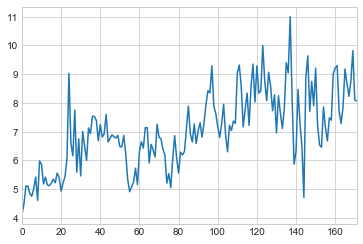

In [121]:
#Turkey Plot
print(z.describe())
z.plot()

In [104]:
UK_all[columnname_for_unit_value][endindex[1]]

4.95

In [ ]:
#UK_all.iloc[1:5,:]
#UK_all.iloc[4:5,:]
#UK_all.shape
#UK_all.iloc[4:5,1:3]

In [ ]:
if Product==841810 :
    UK_all=UK_all.reindex(columns=['Turkey','China','Poland','Korea, Republic of','Italy','Date'])

    UK_all=UK_all.rename(columns = {'Turkey':'TUR_GBR_841810_UV'})
    UK_all['TUR_GBR_841810_UV-1'] = UK_all['TUR_GBR_841810_UV'].shift(1)
    UK_all['TUR_GBR_841810_UV-2'] = UK_all['TUR_GBR_841810_UV'].shift(2)
    UK_all['TUR_GBR_841810_UV-3'] = UK_all['TUR_GBR_841810_UV'].shift(3)
    UK_all['TUR_GBR_841810_UV-6'] = UK_all['TUR_GBR_841810_UV'].shift(6)
    UK_all['TUR_GBR_841810_UV-12'] = UK_all['TUR_GBR_841810_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'China':'CHN_GBR_841810_UV'})
    UK_all['CHN_GBR_841810_UV-1'] = UK_all['CHN_GBR_841810_UV'].shift(1)
    UK_all['CHN_GBR_841810_UV-2'] = UK_all['CHN_GBR_841810_UV'].shift(2)
    UK_all['CHN_GBR_841810_UV-3'] = UK_all['CHN_GBR_841810_UV'].shift(3)
    UK_all['CHN_GBR_841810_UV-6'] = UK_all['CHN_GBR_841810_UV'].shift(6)
    UK_all['CHN_GBR_841810_UV-12'] = UK_all['CHN_GBR_841810_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Poland':'POL_GBR_841810_UV'})
    UK_all['POL_GBR_841810_UV-1'] = UK_all['POL_GBR_841810_UV'].shift(1)
    UK_all['POL_GBR_841810_UV-2'] = UK_all['POL_GBR_841810_UV'].shift(2)
    UK_all['POL_GBR_841810_UV-3'] = UK_all['POL_GBR_841810_UV'].shift(3)
    UK_all['POL_GBR_841810_UV-6'] = UK_all['POL_GBR_841810_UV'].shift(6)
    UK_all['POL_GBR_841810_UV-12'] = UK_all['POL_GBR_841810_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Korea, Republic of':'KOR_GBR_841810_UV'})
    UK_all['KOR_GBR_841810_UV-1'] = UK_all['KOR_GBR_841810_UV'].shift(1)
    UK_all['KOR_GBR_841810_UV-2'] = UK_all['KOR_GBR_841810_UV'].shift(2)
    UK_all['KOR_GBR_841810_UV-3'] = UK_all['KOR_GBR_841810_UV'].shift(3)
    UK_all['KOR_GBR_841810_UV-6'] = UK_all['KOR_GBR_841810_UV'].shift(6)
    UK_all['KOR_GBR_841810_UV-12'] = UK_all['KOR_GBR_841810_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Italy':'ITA_GBR_841810_UV'})
    UK_all['ITA_GBR_841810_UV-1'] = UK_all['ITA_GBR_841810_UV'].shift(1)
    UK_all['ITA_GBR_841810_UV-2'] = UK_all['ITA_GBR_841810_UV'].shift(2)
    UK_all['ITA_GBR_841810_UV-3'] = UK_all['ITA_GBR_841810_UV'].shift(3)
    UK_all['ITA_GBR_841810_UV-6'] = UK_all['ITA_GBR_841810_UV'].shift(6)
    UK_all['ITA_GBR_841810_UV-12'] = UK_all['ITA_GBR_841810_UV'].shift(12)

elif Product==841840:

    UK_all=UK_all.reindex(columns=['Turkey','China','Germany','Netherlands','Hungary','Date'])
    UK_all=UK_all.rename(columns = {'Turkey':'TUR_GBR_841840_UV'})
    UK_all['TUR_GBR_841840_UV-1'] = UK_all['TUR_GBR_841840_UV'].shift(1)
    UK_all['TUR_GBR_841840_UV-2'] = UK_all['TUR_GBR_841840_UV'].shift(2)
    UK_all['TUR_GBR_841840_UV-3'] = UK_all['TUR_GBR_841840_UV'].shift(3)
    UK_all['TUR_GBR_841840_UV-6'] = UK_all['TUR_GBR_841840_UV'].shift(6)
    UK_all['TUR_GBR_841840_UV-12'] = UK_all['TUR_GBR_841840_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'China':'CHN_GBR_841840_UV'})
    UK_all['CHN_GBR_841840_UV-1'] = UK_all['CHN_GBR_841840_UV'].shift(1)
    UK_all['CHN_GBR_841840_UV-2'] = UK_all['CHN_GBR_841840_UV'].shift(2)
    UK_all['CHN_GBR_841840_UV-3'] = UK_all['CHN_GBR_841840_UV'].shift(3)
    UK_all['CHN_GBR_841840_UV-6'] = UK_all['CHN_GBR_841840_UV'].shift(6)
    UK_all['CHN_GBR_841840_UV-12'] = UK_all['CHN_GBR_841840_UV'].shift(12)

    
    UK_all=UK_all.rename(columns = {'Germany':'DEU_GBR_841840_UV'})
    UK_all['DEU_GBR_841840_UV-1'] = UK_all['DEU_GBR_841840_UV'].shift(1)
    UK_all['DEU_GBR_841840_UV-2'] = UK_all['DEU_GBR_841840_UV'].shift(2)
    UK_all['DEU_GBR_841840_UV-3'] = UK_all['DEU_GBR_841840_UV'].shift(3)
    UK_all['DEU_GBR_841840_UV-6'] = UK_all['DEU_GBR_841840_UV'].shift(6)
    UK_all['DEU_GBR_841840_UV-12'] = UK_all['DEU_GBR_841840_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Netherlands':'NLD_GBR_841840_UV'})
    UK_all['NLD_GBR_841840_UV-1'] = UK_all['NLD_GBR_841840_UV'].shift(1)
    UK_all['NLD_GBR_841840_UV-2'] = UK_all['NLD_GBR_841840_UV'].shift(2)
    UK_all['NLD_GBR_841840_UV-3'] = UK_all['NLD_GBR_841840_UV'].shift(3)
    UK_all['NLD_GBR_841840_UV-6'] = UK_all['NLD_GBR_841840_UV'].shift(6)
    UK_all['NLD_GBR_841840_UV-12'] = UK_all['NLD_GBR_841840_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Hungary':'HUN_GBR_841840_UV'})
    UK_all['HUN_GBR_841840_UV-1'] = UK_all['HUN_GBR_841840_UV'].shift(1)
    UK_all['HUN_GBR_841840_UV-2'] = UK_all['HUN_GBR_841840_UV'].shift(2)
    UK_all['HUN_GBR_841840_UV-3'] = UK_all['HUN_GBR_841840_UV'].shift(3)
    UK_all['HUN_GBR_841840_UV-6'] = UK_all['HUN_GBR_841840_UV'].shift(6)
    UK_all['HUN_GBR_841840_UV-12'] = UK_all['HUN_GBR_841840_UV'].shift(12)
    
elif Product==841850:
    UK_all=UK_all.reindex(columns=['Turkey','China','Austria','Czech Republic','Italy','Date'])
    UK_all=UK_all.rename(columns = {'Turkey':'TUR_GBR_841850_UV'})
    UK_all['TUR_GBR_841850_UV-1'] = UK_all['TUR_GBR_841850_UV'].shift(1)
    UK_all['TUR_GBR_841850_UV-2'] = UK_all['TUR_GBR_841850_UV'].shift(2)
    UK_all['TUR_GBR_841850_UV-3'] = UK_all['TUR_GBR_841850_UV'].shift(3)
    UK_all['TUR_GBR_841850_UV-6'] = UK_all['TUR_GBR_841850_UV'].shift(6)
    UK_all['TUR_GBR_841850_UV-12'] = UK_all['TUR_GBR_841850_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'China':'CHN_GBR_841850_UV'})
    UK_all['CHN_GBR_841850_UV-1'] = UK_all['CHN_GBR_841850_UV'].shift(1)
    UK_all['CHN_GBR_841850_UV-2'] = UK_all['CHN_GBR_841850_UV'].shift(2)
    UK_all['CHN_GBR_841850_UV-3'] = UK_all['CHN_GBR_841850_UV'].shift(3)
    UK_all['CHN_GBR_841850_UV-6'] = UK_all['CHN_GBR_841850_UV'].shift(6)
    UK_all['CHN_GBR_841850_UV-12'] = UK_all['CHN_GBR_841850_UV'].shift(12)

    
    UK_all=UK_all.rename(columns = {'Austria':'AUT_GBR_841850_UV'})
    UK_all['AUT_GBR_841850_UV-1'] = UK_all['AUT_GBR_841850_UV'].shift(1)
    UK_all['AUT_GBR_841850_UV-2'] = UK_all['AUT_GBR_841850_UV'].shift(2)
    UK_all['AUT_GBR_841850_UV-3'] = UK_all['AUT_GBR_841850_UV'].shift(3)
    UK_all['AUT_GBR_841850_UV-6'] = UK_all['AUT_GBR_841850_UV'].shift(6)
    UK_all['AUT_GBR_841850_UV-12'] = UK_all['AUT_GBR_841850_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Czech Republic':'CHZ_GBR_841850_UV'})
    UK_all['CHZ_GBR_841850_UV-1'] = UK_all['CHZ_GBR_841850_UV'].shift(1)
    UK_all['CHZ_GBR_841850_UV-2'] = UK_all['CHZ_GBR_841850_UV'].shift(2)
    UK_all['CHZ_GBR_841850_UV-3'] = UK_all['CHZ_GBR_841850_UV'].shift(3)
    UK_all['CHZ_GBR_841850_UV-6'] = UK_all['CHZ_GBR_841850_UV'].shift(6)
    UK_all['CHZ_GBR_841850_UV-12'] = UK_all['CHZ_GBR_841850_UV'].shift(12)

    UK_all=UK_all.rename(columns = {'Italy':'ITA_GBR_841850_UV'})
    UK_all['ITA_GBR_841850_UV-1'] = UK_all['ITA_GBR_841850_UV'].shift(1)
    UK_all['ITA_GBR_841850_UV-2'] = UK_all['ITA_GBR_841850_UV'].shift(2)
    UK_all['ITA_GBR_841850_UV-3'] = UK_all['ITA_GBR_841850_UV'].shift(3)
    UK_all['ITA_GBR_841850_UV-6'] = UK_all['ITA_GBR_841850_UV'].shift(6)
    UK_all['ITA_GBR_841850_UV-12'] = UK_all['ITA_GBR_841850_UV'].shift(12)


In [ ]:
UK_all=UK_all.drop_duplicates('Date')
#UK_all=UK_all.dropna()
UK_all.to_excel('{}_GBR_all_unit_value.xlsx'.format(Product),index = False)